In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
df = pd.read_csv('population_by_country_2020.csv')
Q1 =df[(df['Region'] == 'LATIN')  & (df['Med. Age'] > 0)]
Q1.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Region
7,Argentina,45267449,0.93%,415097,17,2736690,4800.0,2.3,32.0,93%,0.58%,LATIN
9,Aruba,106845,0.43%,452,593,180,201.0,1.9,41.0,44%,0.00%,LATIN
13,Bahamas,393893,0.97%,3762,39,10010,1000.0,1.8,32.0,86%,0.01%,LATIN
16,Barbados,287437,0.12%,350,668,430,-79.0,1.6,40.0,31%,0.00%,LATIN
19,Belize,398845,1.86%,7275,17,22810,1200.0,2.3,25.0,46%,0.01%,LATIN


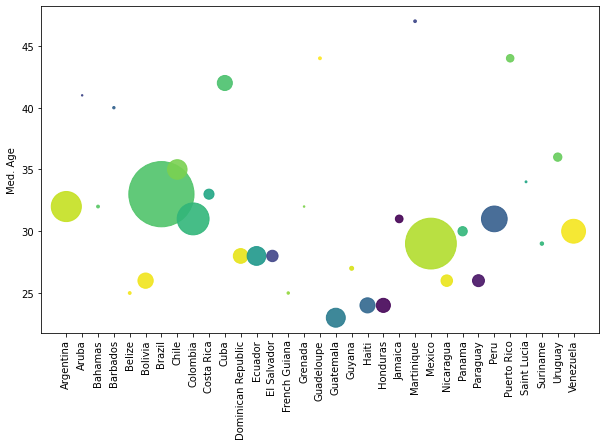

In [4]:
# libraries
import matplotlib.pyplot as plt
import numpy as np

colors = np.random.rand(len(Q1['Country (or dependency)']))

plt.figure(figsize=(10,6))
# use the scatter function
plt.scatter(Q1['Country (or dependency)'], 
            Q1['Med. Age'], 
            s=(Q1['Population (2020)']/50000), 
            alpha=0.9, 
            c=colors)
plt.xticks(rotation=90)
plt.ylabel("Med. Age")
# show the graph
plt.savefig('BubbleChart.png')
plt.show()

In [73]:
url_geojson = "peru_departamental_simple.geojson"
region_geojson = gpd.read_file(url_geojson)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


In [74]:
df = pd.read_csv('Universidades.csv')
Q2 = df.groupby('DEPARTAMENTO').size().reset_index(name='Numero de Universidades')
Q2.head()
# df1 = DataFrame.groupby(Column).size().reset_index(name='Total')

,DEPARTAMENTO,Numero de Universidades
0,AMAZONAS,3
1,ANCASH,4
2,APURIMAC,3
3,AREQUIPA,7
4,AYACUCHO,3


In [75]:
region_geojson = region_geojson.merge(
    right = Q2,
    left_on= 'NOMBDEP',
    right_on= 'DEPARTAMENTO',
    how = 'left'
)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,DEPARTAMENTO,Numero de Universidades
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",AMAZONAS,3
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",ANCASH,4
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",APURIMAC,3
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",AREQUIPA,7
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",AYACUCHO,3


<AxesSubplot:>

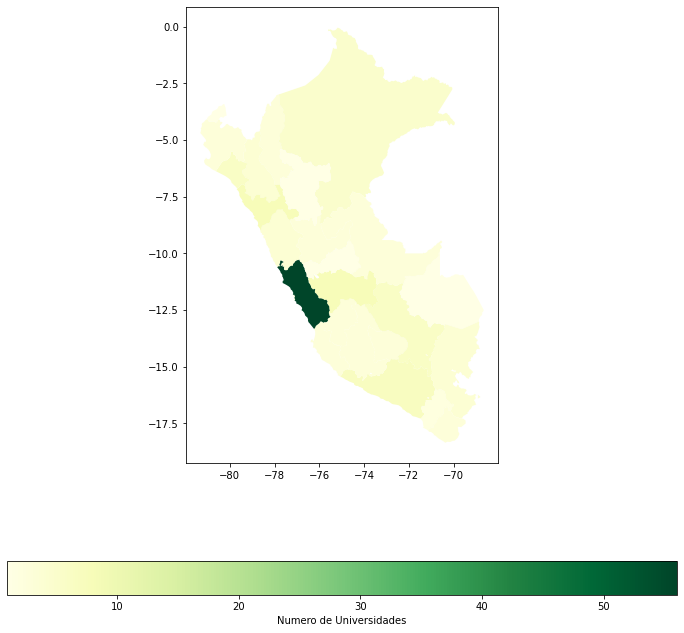

In [86]:
region_geojson.plot(column='Numero de Universidades',
                    legend=True,
                    legend_kwds= {
                        'label':'Numero de Universidades',
                        'orientation':'horizontal'},
                    cmap='YlGn',
                    figsize=(12,12)
                    )

[Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

[Mapping and Plotting Tools - Geopandas](https://geopandas.org/en/stable/docs/user_guide/mapping.html)